# Data Science Module 1 Final Project: <br>Predicting the Sale Price of Houses in King County

Student Names: Natasha Kacoroski and David Kaspar <br>
Student Pace: Full time <br>
Scheduled Project Review Date/Time: 17 April 2019, 10:45 a.m. <br>
Instructor Names: Miles Erickson and Greg Damico <br>
Blog Post URL: TBD <br>

## Step 1: Load Libraries and Obtain Data

We import the following libraries.

In [1]:
import pandas as pd # to easily manipulate data in dataframes
import numpy as np # to perform mathematical functions with the data
import seaborn as sns # to graph the data
import matplotlib.pyplot as plt # to graph the data
import sklearn as sk # to build a regression model with the data
from sklearn.model_selection import train_test_split # to split the data into training and testing groups
from sklearn.linear_model import LinearRegression # to perform regressions on the data
from scipy import stats # to determine data statistics
from scipy.stats import zscore, norm # to take the zscore and norm of the data

# to make graph figures inline with the jupyter notebook
%matplotlib inline 

Then import the data from a csv file into a pandas dataframe.

In [2]:
df_total = pd.read_csv('kc_house_data.csv')

And save 15% of the data to validate our model at the end.

In [3]:
msk = np.random.rand(len(df_total)) < 0.85 # Set percentage of data aside
df = df_total[msk].copy() # Assign data for training and testing to dataframe
validate_df = df_total[~msk].copy() # Assign data to validate to dataframe

## Step 2: Scrub Data

### Preview and Initial Observations

We transpose the head of the data to see all the columns easily.

In [4]:
df.head().T

,0,3,4,5,6
id,7129300520,2487200875,1954400510,7237550310,1321400060
date,10/13/2014,12/9/2014,2/18/2015,5/12/2014,6/27/2014
price,221900,604000,510000,1.23e+06,257500
bedrooms,3,4,3,4,3
bathrooms,1,3,2,4.5,2.25
sqft_living,1180,1960,1680,5420,1715
sqft_lot,5650,5000,8080,101930,6819
floors,1,1,1,1,2
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


Columns are correctly labeled. To confirm our understanding we import the markdown documentation file on column information.

In [5]:
# adapted from: https://groups.google.com/forum/#!topic/jupyter/uOe3PyxbcqU

from IPython.display import display, Markdown

with open('column_names.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))

COLUMN NAMES AND DESCRIPTIONS FOR KING COUNTRY DATA SET
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


Most column descriptions confirm what we inferred from the column name. We learn that view means whether the house has been viewed (assumed to be potential buyers), and sqft_living15 and sqft_lot15 refer to the square footage of interior housing living space and land lots for nearest 15 neighbors. Also of interest is the grade given to housing unit based on King County grading system found here: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r.

BUILDING GRADE <br>
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish     work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13  = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

After understanding the column descriptions, we look at the value information for each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18437 entries, 0 to 21596
Data columns (total 21 columns):
id               18437 non-null int64
date             18437 non-null object
price            18437 non-null float64
bedrooms         18437 non-null int64
bathrooms        18437 non-null float64
sqft_living      18437 non-null int64
sqft_lot         18437 non-null int64
floors           18437 non-null float64
waterfront       16405 non-null float64
view             18386 non-null float64
condition        18437 non-null int64
grade            18437 non-null int64
sqft_above       18437 non-null int64
sqft_basement    18437 non-null object
yr_built         18437 non-null int64
yr_renovated     15170 non-null float64
zipcode          18437 non-null int64
lat              18437 non-null float64
long             18437 non-null float64
sqft_living15    18437 non-null int64
sqft_lot15       18437 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.1+ MB


Our dataframe has 21,587 entries and 21 columns, with data types of float64(8), int64(11), and object(2). There are null values in waterfront, view, and yr_renovated. Columns to consider changing data types are: id from int64 to a object (value is independent of magnitude), date to a timestamp (makes it easier to manipulate), sqft_basement from object to int64 (value is dependent on magnitude), and zipcode from int64 to object (value is independent of magnitude). Also, yr_built is int64 while yr_renovated is float64, which is odd and needs further investigation. It would also be useful to know which columns contain continuous or discrete data because that will influence how we deal with null values and will be a factor in determining on-hot encoding.

### Address null values and determine if values are continuous or discrete

We start by making a function that returns the null value percentange and whether data is continuous or discrete.

In [7]:
def null_percentage_and_data_continuity(df):
    """Returns data type, percentage of null values in data column if nulls exist, 
    and whether data is continuous or discrete."""
    display_df = df.head(1).applymap(type) # make dataframe of data types
    percent_nan = {} # null percentage dictionary
    disc_or_cont = {} # discrete or continuous dictionary
    for i, col in enumerate(df): # iterate through each column
        col_percent_nan = round(100*df[col].isna().sum() / len(df[col]), 2) # find null percentage
        percent_nan[col] = [col_percent_nan] # add to dictionary
        if df[col].nunique() < 100: # less than 100 unique values, add to dictionary as discrete, otherwise continuous
            disc_or_cont[col] = ['disc'] 
        else:
            disc_or_cont[col] = ['cont'] 
    percent_nan_df = pd.DataFrame.from_dict(percent_nan, orient='columns') # make dataframes of dictionaries
    disc_or_cont_df = pd.DataFrame.from_dict(disc_or_cont, orient='columns')
    final = pd.concat([display_df, percent_nan_df, disc_or_cont_df]).T # combine all dataframes in one
    final.columns = ['dtype', 'percent null', 'cont or disc']
    return final # return combined dataframe

In [8]:
null_percentage_and_data_continuity(df)

,dtype,percent null,cont or disc
id,<class 'int'>,0,cont
date,<class 'str'>,0,cont
price,<class 'float'>,0,cont
bedrooms,<class 'int'>,0,disc
bathrooms,<class 'float'>,0,disc
sqft_living,<class 'int'>,0,cont
sqft_lot,<class 'int'>,0,cont
floors,<class 'float'>,0,disc
waterfront,<class 'float'>,11.02,disc
view,<class 'float'>,0.28,disc


For waterfront, 11% of the values are null and the data appears to be discrete. We check the unique values.

In [9]:
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())
for count in list(df['waterfront'].value_counts()):
    print(count / sum(list(df['waterfront'].value_counts()))*100)

[nan  0.  1.]
0.0    16280
1.0      125
Name: waterfront, dtype: int64
99.23803718378544
0.7619628162145687


Waterfront is binary, with 0 as no waterfront view and 1 as a waterfront view. Since the value count of 0 is significantly more common (99.2%), we replace all null values with 0.

In [10]:
df.loc[:, 'waterfront'] = df['waterfront'].fillna(0.0)
df.waterfront.isna().any()

False

Moving onto view. The description for view is "has been viewed." Although we cannot confirm, we picture this as the number of people who have viewed the house at the time that the data for this house sale was collected. 0.29% of the view values are null and it appears to be discrete. Below we check the unique values.

In [11]:
print(df['view'].unique())
print(df['view'].value_counts())
print(df['view'].median())
for count in list(df['view'].value_counts()):
    print(count / sum(list(df['view'].value_counts()))*100)

[ 0. nan  3.  2.  4.  1.]
0.0    16562
2.0      841
3.0      425
1.0      289
4.0      269
Name: view, dtype: int64
0.0
90.07940824540411
4.574132492113565
2.3115413901881867
1.5718481453279671
1.4630697269661699


Since the value count of 0 is significantly more common (90.2%, also the median), we decided to replace all null values with 0.

In [12]:
df.loc[:, 'view'] = df['view'].fillna(0.0)
df['view'].isna().any()

False

For yr_renovated, the values are the year where any renovations took place. They appear to be discrete and 17.8% of the values are null. Below are the unique values.

In [13]:
print(df['yr_renovated'].value_counts().head())
renovated_num = df.loc[df['yr_renovated'] > 0, :].shape[0]
renovated_num/len(df)*100

0.0       14516
2014.0       62
2003.0       28
2013.0       28
2000.0       27
Name: yr_renovated, dtype: int64


3.547214839724467

Looking at the unique values we see that null and 0 are values for year renovated. We were already aware of the nulls, and decide that 0 could either mean that house was never renovated or renovations were not tracked. We decided to drop year renovated because of the uncertainty and because actual house renovations are only 3.4% of the year renovated values. 

In [14]:
df.drop('yr_renovated', axis=1, inplace=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Change data types

For the ID column we considered changing the values to an object and making that the primary key. From looking at unique values for the column (see below), we saw that there were some duplicates because the ID seems to refer to house sale instance, and some houses have been sold more than once. Since the ID column is not valuable to us as a primary key, we decided to drop the column. We also considered dropping duplicate values, but since we are using data about all house sale instances, we decided to keep it in.

In [15]:
df['id'].duplicated().any()

True

In [16]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

To change the sqft_basement from an object to an integer, we try using pd.to_numeric, this returns an error. Looking at unique values, we see that the only non-numeric value are questionmarks.

In [17]:
df['sqft_basement'].unique()

array(['0.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0', '970.0',
       '760.0', '700.0', '820.0', '780.0', '330.0', '1620.0', '360.0',
       '588.0', '1510.0', '410.0', '990.0', '600.0', '1000.0', '1600.0',
       '500.0', '1040.0', '880.0', '1010.0', '240.0', '290.0', '800.0',
       '540.0', '560.0', '710.0', '840.0', '380.0', '570.0', '1490.0',
       '620.0', '1250.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '400.0', '640.0',
       '1070.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '850.0',
       '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0',
       '580.0', '2060.0', '1820.0', '790.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '770.0', '1400.0', '720.0',
       '490.0', '660.0', '900.0', '420.0', '1580.0', '1380.0', '475.0',
       '690.0', '350.0', '935.0', '1370.0', '980.0', '

In [19]:
print(df['sqft_basement'].value_counts().head())
questionmark_num = df.loc[df['sqft_basement'] == '?', :].shape[0]
questionmark_num/len(df)*100

0.0      10934
?          386
600.0      197
500.0      176
800.0      176
Name: sqft_basement, dtype: int64


2.093616098063676

Although the questionmark has the second highest value count, it is only 2.1% of the sqft_basement values. Since we have square foot living and square foot above data, we replace each questionmark with the difference of the two values. 

In [20]:
df.sqft_basement = df.sqft_basement.replace('?', df['sqft_living'] - df['sqft_above'])
df.sqft_basement = pd.to_numeric(df['sqft_basement'])
df.sqft_basement.dtype

dtype('float64')

Moving on to zipcode, all the unique values look like zipcodes, so we convert them to strings.

In [21]:
df.zipcode.unique()

array([98178, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007,
       98115, 98028, 98126, 98019, 98002, 98133, 98092, 98030, 98119,
       98112, 98052, 98027, 98117, 98058, 98107, 98001, 98056, 98166,
       98023, 98070, 98148, 98105, 98042, 98008, 98059, 98144, 98004,
       98005, 98125, 98075, 98116, 98010, 98118, 98199, 98040, 98032,
       98102, 98077, 98103, 98108, 98168, 98177, 98034, 98065, 98029,
       98006, 98109, 98022, 98033, 98122, 98155, 98024, 98011, 98031,
       98106, 98045, 98072, 98188, 98014, 98055, 98039])

In [22]:
df['zipcode'] = df['zipcode'].astype(str)
df['zipcode'].dtype

dtype('O')

The last data type change is to change the date column from object to date type so that it is easier to manipulate.

In [23]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
df.date.dtype

dtype('<M8[ns]')

### Feature Scaling

We think that specific dates will not be significant in predicting housing price so we decide to add year and month columns to the dataframe and remove the date column. 

In [24]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.drop(['date'], axis=1, inplace=True)

After our initial exploratory data analysis, we discover that year is mostly binary, with data from only 2014 and 2015. We decide to drop year and change month to a string. Before multiple linear regression we will on-hot-encode month.

In [25]:
df['month'] = df['month'].astype(str)
df['month'].dtype

dtype('O')

We think distance to employment center will be an important predictor variable and use latitude and longitude to calculate distance from Seattle with the Pike Pine Retail Core as the epicenter.

In [27]:
long_lat = df[['long', 'lat']] # take dataframe subset

In [31]:
# adapted from:  https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points/4913653

from math import radians, cos, sin, asin, sqrt

def haversine(df_lon_lat, lon2=-122.336283, lat2=47.609395):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees), in this case the 2nd point is in the Pike Pine Retail Core
    """
    lon1, lat1 = df_lon_lat[0], df_lon_lat[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

df['dist_to_seattle'] = long_lat.apply(haversine, axis=1)
df = df.drop(['lat', 'long'], axis=1)

KeyError: "['lat' 'long'] not found in axis"

From our domain knowledge of real estate, we know that house prices are often set by the prices of surrounding houses. We explore using latitude and longitude to determine average housing price of the 15 nearest neighbors and estimate that it would add ~200 million columns and be too computationally expensive. We explore using other libraries like GeoPandas and SciPy to make it less computationally expensive. We believe that using the scipy.spatial.cKDTree class (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html) is a viable way to do it but due to time constraints decide to move on. Instead we take the average zipcode price as an additional predictor variable.

In [29]:
df['z_price'] = df['zipcode'].map(df.groupby('zipcode')['price'].mean())

## Step 2: Exploratory Data Analysis of King County Housing Data

To get an initial visualization of our data we make joint plots of all our predictor variables against target variable. 

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'year', 'month', 'dist_to_seattle', 'z_price'],
      dtype='object')

In [ ]:
eda_variable_df = df..copy()

In [ ]:
def make_jp(data):
    """Make joint plot of each predictor variable and target uvariable"""
    for i, col in enumerate(data):
        sns.jointplot(data[col], df['price'], kind='reg', scatter_kws={'alpha':0.15}, height=8)

In [ ]:
make_jp(eda_variable_df)

### Check for Multicollinearity

First, we made a heatmap to get a visual of the correlation matrix for our data.

In [ ]:
def corr_matrix(df):
    """Make a correlation matrix to check data for collinearity."""
    # Compute the correlation matrix
    corr = np.abs(df.corr())

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    plt.title('Correlation Matrix Heatmap')
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});
    
corr_matrix(df)

We decided to use the absolute value of 0.7 as a cut-off for high correlation.

In [ ]:
df_corr = abs(df.corr()) > 0.70
df_corr.sum()

Square Foot Living is the highest offender for collinearity, however from our domain knowledge and from our test model of a linear regression it also seems to be a good predictor model. For now we will keep it in our variable dataframe for predicting housing price and test our model with removing it, and other variables with high collinearity. For now we will create a variable dataframe of predictor variables to explore, dropping latitude, longitude, and zipcode columns.

## Step 3: Modeling of King County Housing Data with Multivariate Linear Regression

### On-Hot-Encoding

Before modeling we on-hot-encoded zipcode and month.

In [40]:
z_dummies = pd.get_dummies(df['zipcode'], prefix='z')
m_dummies = pd.get_dummies(df['month'], prefix='m')

In [41]:
df = df.drop(['zipcode', 'month'], axis=1)

In [42]:
numeric_df = df.drop('year', axis=1).copy()

In [43]:
numeric_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'dist_to_seattle', 'z_price'],
      dtype='object')

In [44]:
df = pd.concat([df, z_dummies, m_dummies], axis=1)

And prepared our dataframes for modeling.

In [45]:
variable_df = df.drop('price', axis=1)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

all_model_mae = {}

def linreg_tts(data, response, k=5):
    y = response
    X = data
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    predictions = linreg.predict(X_test)

    plt.scatter(y_test, predictions)
    plt.xlabel(f"True Values")
    plt.ylabel(f"Multi Variable Linear Predictions")
    print("Single LinReg Score:", model.score(X_test, y_test))  
    
    cross_val_array = cross_val_score(linreg, X, y, cv=k, scoring="neg_mean_absolute_error")#"neg_mean_squared_error")
    avg_cross_val = np.mean(cross_val_array)
    #rmse = np.abs(avg_cross_val)**.5
    mae = -avg_cross_val
    all_model_mae[(mae, cross_val_array.std())] = list(data.columns)
    print(f"MAE with {k} folds:{mae}")
    return model


Single LinReg Score: 0.47680766222923476
MAE with 5 folds:174032.2546439614


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

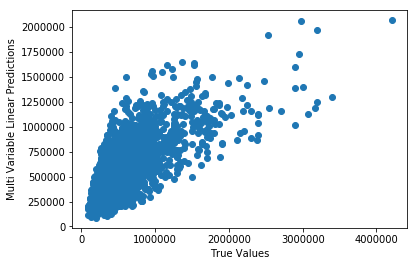

In [47]:
linreg_tts(df[['sqft_living']], df[['price']])

Single LinReg Score: 0.8124570297821682
MAE with 5 folds:96688.79482290575


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

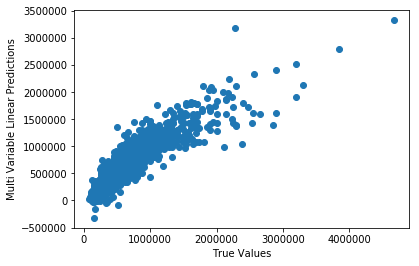

In [48]:
linreg_tts(variable_df, df[['price']])

In [49]:
numeric_df['price'] = df['price']
no_outliers = df[(np.abs(zscore(numeric_df.loc[:, numeric_df.columns])) < 3).all(axis=1)]   
no_outliers.shape

(16414, 100)

Single LinReg Score: 0.8318465388888275
MAE with 5 folds:66035.79692518877


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

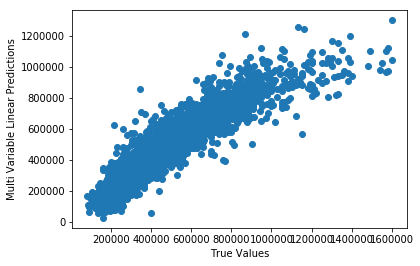

In [50]:
linreg_tts(no_outliers.drop(['price'], axis=1), no_outliers['price'])

In [56]:
to_log_or_not_to_log = numeric_df

def log_test(df):
    for col in df.columns:
        plt.figure(figsize=(10,10), )
        plt.subplot(2,2,1)
        sns.distplot(df[col], fit=norm, kde=False)
        plt.subplot(2,2,2)
        stats.probplot(df[col], plot=plt)
        plt.subplot(2,2,3)
        sns.distplot(np.log(df[col]), fit=norm, kde=False)
        plt.subplot(2,2,4)
        stats.probplot(np.log(df[col]), plot=plt)
        plt.tight_layout()
        plt.show()
        
log_test(to_log_or_not_to_log)

AttributeError: 'Figure' object has no attribute 'title'

<Figure size 720x720 with 0 Axes>

In [ ]:
to_log = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'dist_to_seattle']

def log_data(data=df, to_log=to_log):
    """Creates dataframe with logged data in columns defined by to_log."""
    logged_data = data.copy()
    
    for col in to_log:
        header = "log_of_"+col
        logged_data[header] = np.log(logged_data[col])
        logged_data = logged_data.drop(col, axis=1)
    return logged_data

logged_data = log_data(df)
logged_data_no_outliers = log_data(no_outliers)

In [ ]:
linreg_tts(logged_data.drop(['log_of_price'], axis=1), logged_data[['log_of_price']])

In [ ]:
linreg_tts(logged_data_no_outliers.drop(['log_of_price'], axis=1), logged_data_no_outliers[['log_of_price']])

In [ ]:
logged_data_no_outliers.head()

In [ ]:
log_pred = final.predict(logged_data_no_outliers.drop(['log_of_price'], axis=1).head(1))

In [ ]:
log_pred

In [ ]:
# all_model_mae